In [5]:

!pip install matplotlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [6]:
data = files.upload()
tf.config.list_physical_devices('GPU')

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO.csv


[]

In [7]:
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
dataset.pop('name')
dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [9]:
dataset = pd.get_dummies(dataset, columns=['fuel', 'seller_type', 'transmission', 'owner'], prefix='', prefix_sep='')
dataset

,year,selling_price,km_driven,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [10]:

X = dataset
y = dataset.pop('selling_price')
print(X)
print(y)

      year  km_driven  CNG  ...  Second Owner  Test Drive Car  Third Owner
0     2007      70000    0  ...             0               0            0
1     2007      50000    0  ...             0               0            0
2     2012     100000    0  ...             0               0            0
3     2017      46000    0  ...             0               0            0
4     2014     141000    0  ...             1               0            0
...    ...        ...  ...  ...           ...             ...          ...
4335  2014      80000    0  ...             1               0            0
4336  2014      80000    0  ...             1               0            0
4337  2009      83000    0  ...             1               0            0
4338  2016      90000    0  ...             0               0            0
4339  2016      40000    0  ...             0               0            0

[4340 rows x 17 columns]
0        60000
1       135000
2       600000
3       250000
4       450000

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3038, 17) (3038,)
(1302, 17) (1302,)


In [12]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[2.0131320e+03 6.6415719e+04 9.5457537e-03 5.0526661e-01 3.2916392e-04
 5.9249508e-03 4.7893351e-01 2.2942725e-01 7.4720210e-01 2.3370638e-02
 1.0500329e-01 8.9499670e-01 6.5569454e-01 1.9091507e-02 2.5543121e-01
 3.2916393e-03 6.6491112e-02]


In [13]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 2009 70000     0     1     0     0     0     0     1     0     0     1
      0     0     1     0     0]]

Normalized: [[-0.98  0.08 -0.1   0.99 -0.02 -0.08 -0.96 -0.55  0.58 -0.15 -0.34  0.34
  -1.38 -0.14  1.71 -0.06 -0.27]]


In [14]:
model = tf.keras.Sequential([
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4

In [15]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=2,
    validation_split = 0.2)

Epoch 1/200
76/76 - 1s - loss: 462342.1250 - val_loss: 257773.8906
Epoch 2/200
76/76 - 0s - loss: 222579.5469 - val_loss: 181300.1250
Epoch 3/200
76/76 - 0s - loss: 196806.5625 - val_loss: 172616.7188
Epoch 4/200
76/76 - 0s - loss: 191183.5469 - val_loss: 165484.2188
Epoch 5/200
76/76 - 0s - loss: 187283.1562 - val_loss: 163814.7344
Epoch 6/200
76/76 - 0s - loss: 186361.2500 - val_loss: 165931.1250
Epoch 7/200
76/76 - 0s - loss: 186181.8906 - val_loss: 165167.8750
Epoch 8/200
76/76 - 0s - loss: 185217.9219 - val_loss: 163321.7031
Epoch 9/200
76/76 - 0s - loss: 181039.3438 - val_loss: 164247.5469
Epoch 10/200
76/76 - 0s - loss: 179123.5469 - val_loss: 163353.2188
Epoch 11/200
76/76 - 0s - loss: 177696.9844 - val_loss: 169507.3750
Epoch 12/200
76/76 - 0s - loss: 176697.9219 - val_loss: 165066.1562
Epoch 13/200
76/76 - 0s - loss: 177439.8438 - val_loss: 167316.7188
Epoch 14/200
76/76 - 0s - loss: 176689.5938 - val_loss: 162657.1406
Epoch 15/200
76/76 - 0s - loss: 175880.8281 - val_loss: 1

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,150300.546875,168271.703125,195
196,149735.109375,160434.015625,196
197,149752.984375,157550.078125,197
198,151138.078125,163018.062500,198
199,149807.796875,157980.953125,199


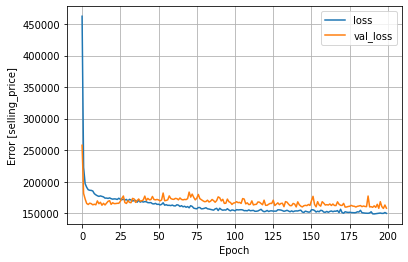

In [17]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [selling_price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [18]:
print(X_test.tail)
print(y_test.tail)

<bound method NDFrame.tail of       year  km_driven  CNG  ...  Second Owner  Test Drive Car  Third Owner
2438  2015     104000    0  ...             1               0            0
1698  2015      22000    0  ...             0               0            0
1478  2019      14000    0  ...             0               0            0
3979  2011     280000    0  ...             0               0            0
1968  2011      50000    0  ...             0               0            1
...    ...        ...  ...  ...           ...             ...          ...
2855  2005     221000    0  ...             0               0            1
2261  2017      19890    0  ...             0               0            0
3721  2018      39000    0  ...             0               0            0
3345  2014     110000    0  ...             1               0            0
492   2011     100000    0  ...             1               0            0

[1302 rows x 17 columns]>
<bound method NDFrame.tail of 2438     3000

In [19]:
predict_dataset = tf.convert_to_tensor([
    [2007,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2007,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2016,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0],
    [2013,65000,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0]
])
predictions = model.predict(X_test)
# df = pd.DataFrame(data = (y_test,predictions))
y_pred = np.array(y_test)
# print(y_pred.reshape(-1,1))
y_pred.reshape(-1,1)
df = pd.DataFrame(data = (y_pred,predictions))
df.T

,0,1
0,300000,[519327.84]
1,300000,[342475.7]
2,1825000,[876234.06]
3,150000,[525611.2]
4,185000,[145753.45]
...,...,...
1297,229999,[205301.53]
1298,550000,[514269.97]
1299,2300000,[1574824.9]
1300,500000,[457459.1]
